In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from model import Discriminator, RDN

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # Remove the CWD from sys.path while we load stuff.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


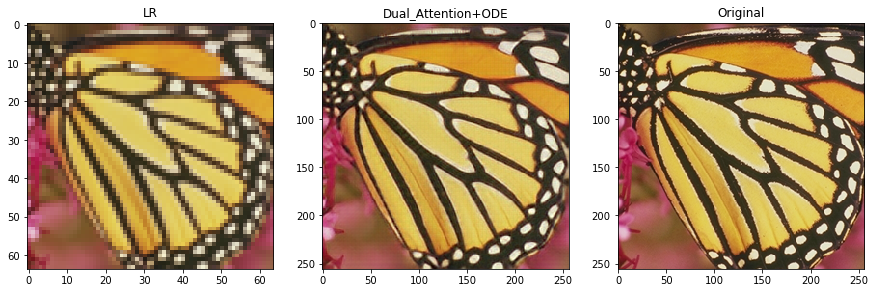

In [6]:
with torch.no_grad():
    model2 = RDN(scale_factor=4,num_channels=3,num_features=64,growth_rate=16,num_blocks=4,num_layers=6,dual_attention=True).eval()
    model2.load_state_dict(torch.load('epochs/dual_att_rdn_netG_epoch_4_150.pth'))
    model2.cuda()
    with torch.no_grad():
        image0 = cv2.imread('butterfly_HR_x4.png')
        
        image0_x2=cv2.imread('butterfly_LRBI_x4.png')
        
        image0_x2 = Variable(ToTensor()(image0_x2), volatile=True).unsqueeze(0).cuda()
        out0=model2(image0_x2)
        fig,ax=plt.subplots(1,3,figsize=(15,15))
        ax[0].imshow(cv2.cvtColor(image0_x2.cpu().detach().numpy()[0].transpose([1,2,0]), cv2.COLOR_RGB2BGR))
        ax[1].imshow(cv2.cvtColor(out0.cpu().detach().numpy()[0].transpose([1,2,0]), cv2.COLOR_RGB2BGR))
        ax[2].imshow(cv2.cvtColor(image0, cv2.COLOR_RGB2BGR))
        ax[0].title.set_text('LR')
        ax[1].title.set_text('Dual_Attention+ODE')
        ax[2].title.set_text('Original')